In [4]:
import pandas as pd

In [5]:
from wordcloud import WordCloud

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, auc

In [7]:
file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\SMSSpamCollection (1).txt"

df = pd.read_table(file_path, sep = '\t', header = None)

In [8]:
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df.head()

,0,1
0,ham,Oh... Okie lor...We go on sat...
1,ham,Aiyah u did ok already lar. E nydc at wheellock?
2,ham,Yeah my usual guy's out of town but there're d...
3,ham,How much i gave to you. Morning.
4,ham,&lt;#&gt; great loxahatchee xmas tree burning...


In [9]:
df.rename(columns={0: 'label', 1:'sms_message'}, inplace=True)
df.head()

,label,sms_message
0,ham,Oh... Okie lor...We go on sat...
1,ham,Aiyah u did ok already lar. E nydc at wheellock?
2,ham,Yeah my usual guy's out of town but there're d...
3,ham,How much i gave to you. Morning.
4,ham,&lt;#&gt; great loxahatchee xmas tree burning...


In [10]:
df['label'] = df['label'].replace('ham',0)
df['label'] = df['label'].replace('spam',1)
df.head()

,label,sms_message
0,0,Oh... Okie lor...We go on sat...
1,0,Aiyah u did ok already lar. E nydc at wheellock?
2,0,Yeah my usual guy's out of town but there're d...
3,0,How much i gave to you. Morning.
4,0,&lt;#&gt; great loxahatchee xmas tree burning...


In [11]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], random_state =42)

X_train_sms.head()

4281    Call Germany for only 1 pence per minute! Call...
585                     Have you always been saying welp?
4545    Update_Now - 12Mths Half Price Orange line ren...
3034                              Watching ajith film ah?
2758                                So wat's da decision?
Name: sms_message, dtype: object

In [12]:
count_vector = CountVectorizer(ngram_range = (1,1), lowercase = True, stop_words = 'english')

In [13]:
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()

In [14]:
X_train_feature_list = count_vector.get_feature_names_out()
print(X_train_feature_list)

['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']


In [15]:
frequencey_matrix_X_train = pd.DataFrame(X_train, columns = X_train_feature_list)
frequencey_matrix_X_train.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,02,0207,...,zebra,zed,zeros,zindgi,zoe,zogtorius,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [17]:
predictions = MNB.predict(X_test)

In [18]:
accuracy_score(predictions,Y_test)

0.9870782483847811

In [19]:
precision_score(predictions, Y_test)

0.9481865284974094

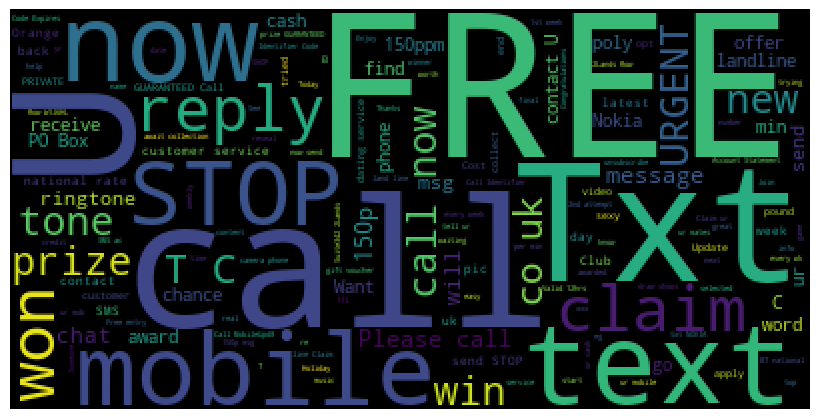

In [20]:
spam_words = ' '.join(X_train_sms[Y_train == 1])
wordcloud = WordCloud( max_words=150).generate(spam_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

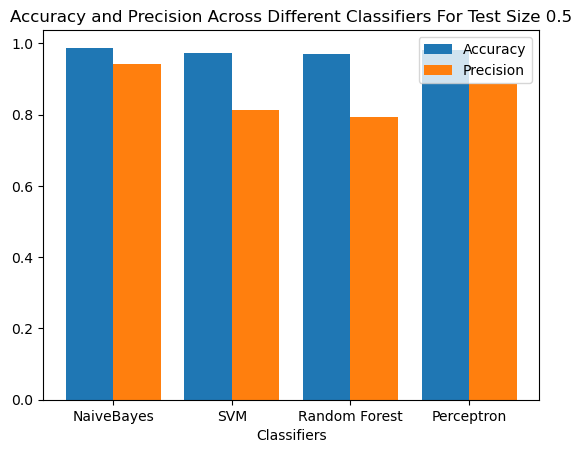

In [25]:
SVM = SVC(kernel = 'rbf')
RF = RandomForestClassifier()
P = Perceptron(random_state = 42)


X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)

  
X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()


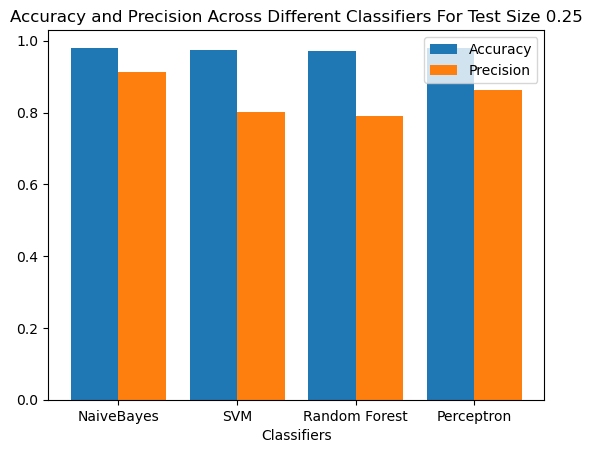

In [66]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

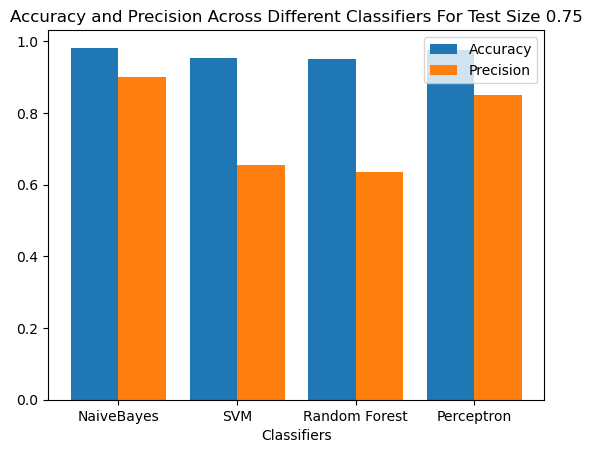

In [67]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()

In [68]:
X = count_vector.fit_transform(df['sms_message'])
Y = df['label']


In [69]:
kf = KFold(n_splits = 5)

Fold 0


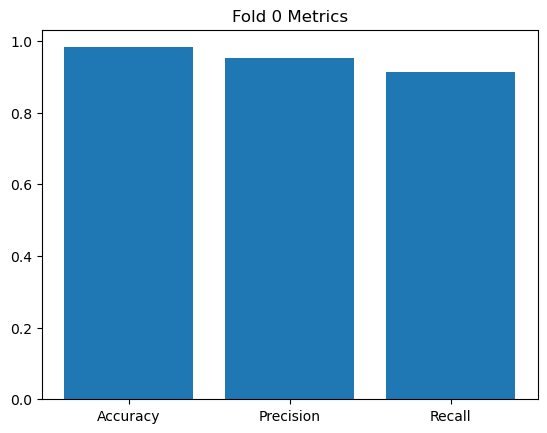

 Accuracy: 0.9820627802690582
 Precision: 0.9513888888888888


Fold 1


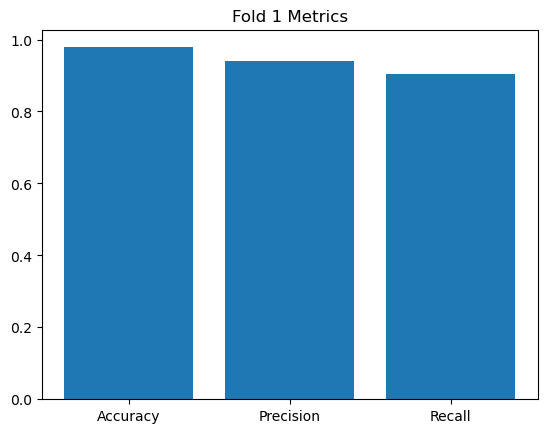

 Accuracy: 0.97847533632287
 Precision: 0.9403973509933775


Fold 2


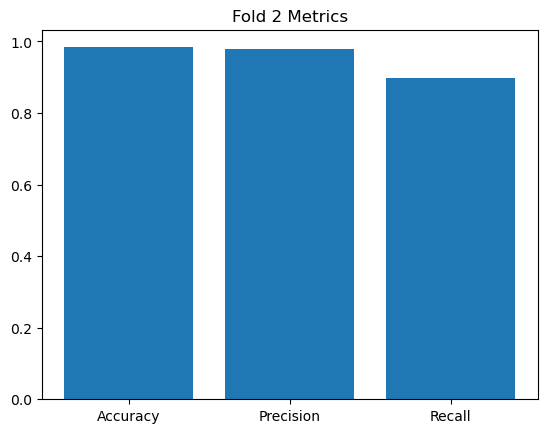

 Accuracy: 0.9838420107719928
 Precision: 0.9779411764705882


Fold 3


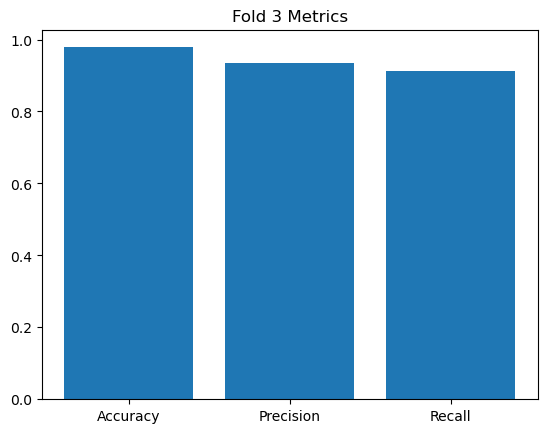

 Accuracy: 0.9784560143626571
 Precision: 0.9358974358974359


Fold 4


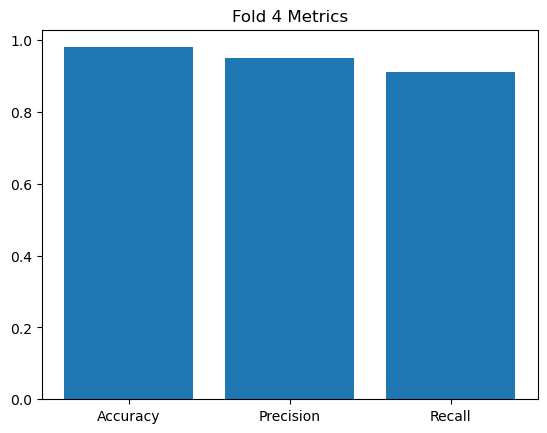

 Accuracy: 0.9793536804308797
 Precision: 0.95


 Mean Accuracy: 0.9804379644314916
 Mean Precision: 0.9511249704500581
 Mean Recall: 0.9078240442853319


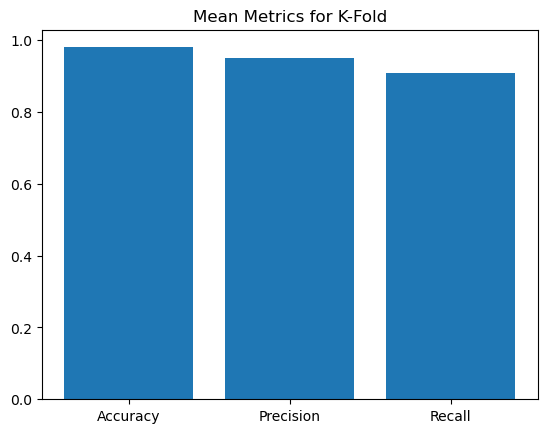

In [70]:
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()


Fold 0


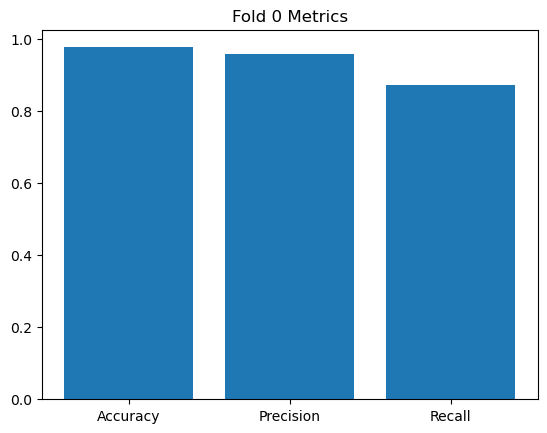

 Accuracy: 0.9767025089605734
 Precision: 0.9583333333333334


Fold 1


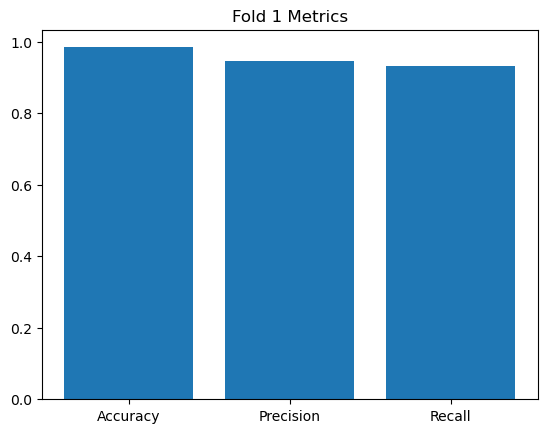

 Accuracy: 0.9838709677419355
 Precision: 0.9452054794520548


Fold 2


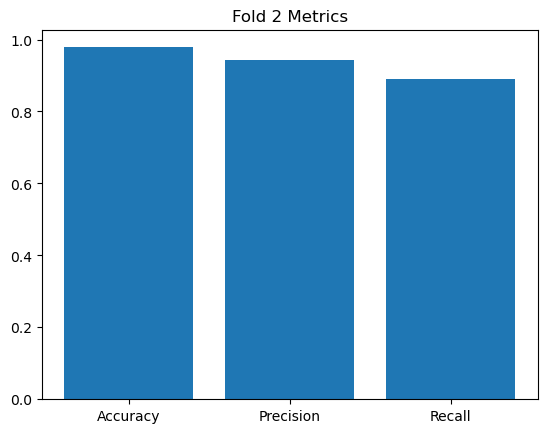

 Accuracy: 0.9784560143626571
 Precision: 0.9420289855072463


Fold 3


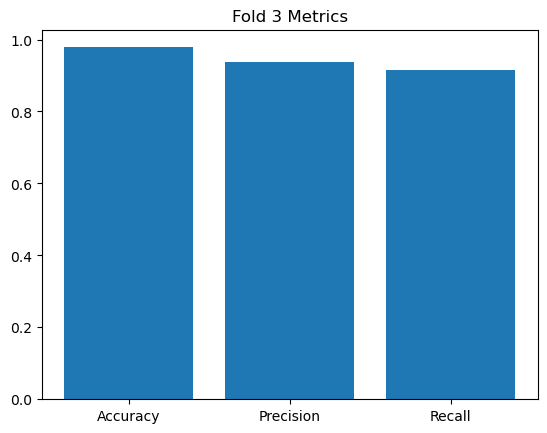

 Accuracy: 0.9784560143626571
 Precision: 0.9382716049382716


Fold 4


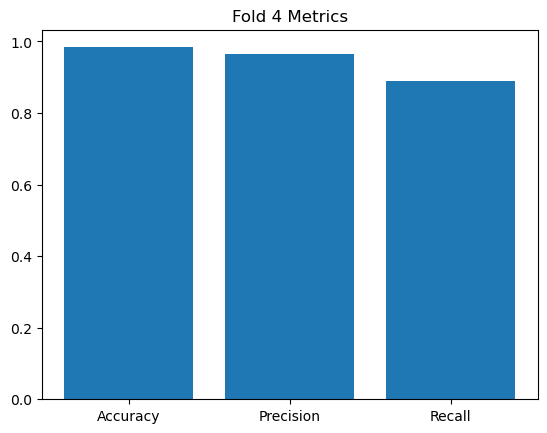

 Accuracy: 0.9838420107719928
 Precision: 0.9655172413793104


Fold 5


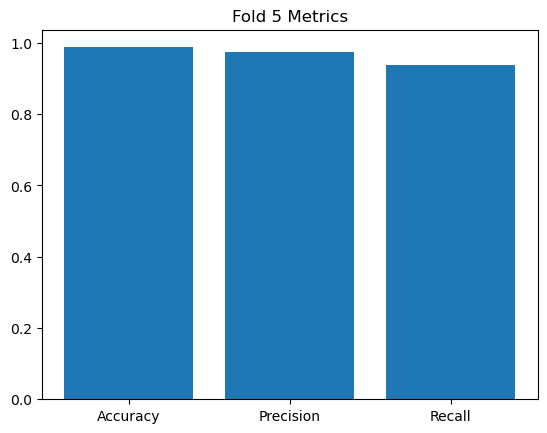

 Accuracy: 0.9874326750448833
 Precision: 0.9743589743589743


Fold 6


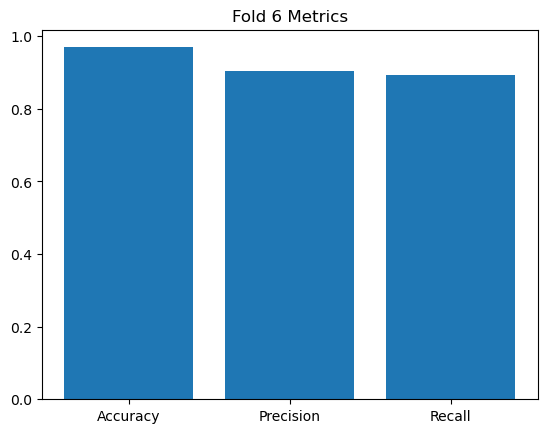

 Accuracy: 0.9694793536804309
 Precision: 0.9047619047619048


Fold 7


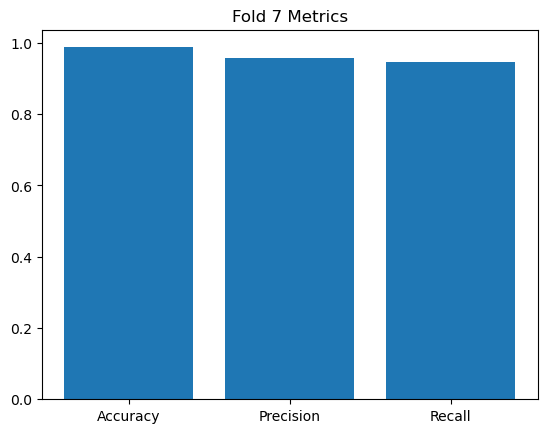

 Accuracy: 0.9874326750448833
 Precision: 0.9583333333333334


Fold 8


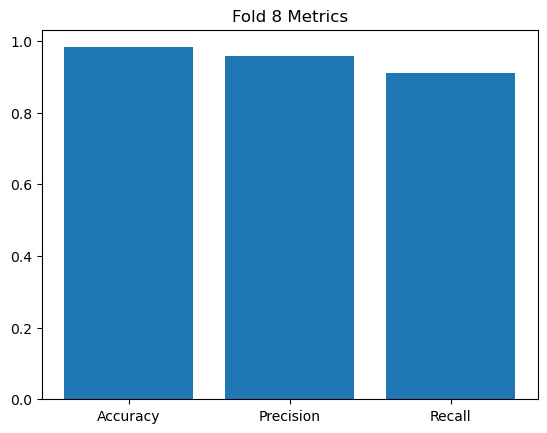

 Accuracy: 0.9820466786355476
 Precision: 0.958904109589041


Fold 9


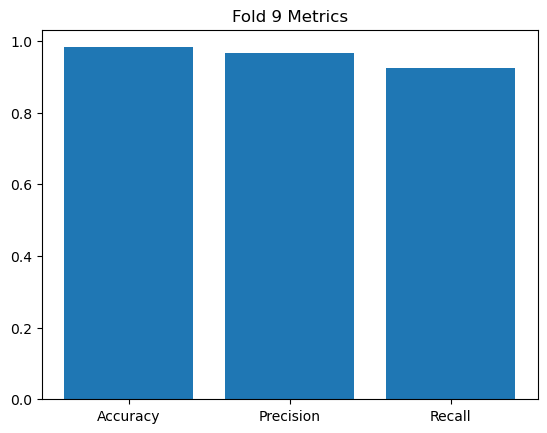

 Accuracy: 0.9820466786355476
 Precision: 0.9655172413793104


 Mean Accuracy: 0.9809765577241109
 Mean Precision: 0.951123220803278
 Mean Recall: 0.9099796958260313


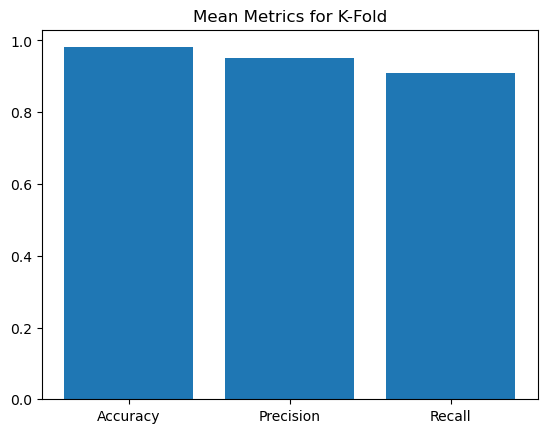

In [71]:
kf = KFold(n_splits = 10)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

Fold 0


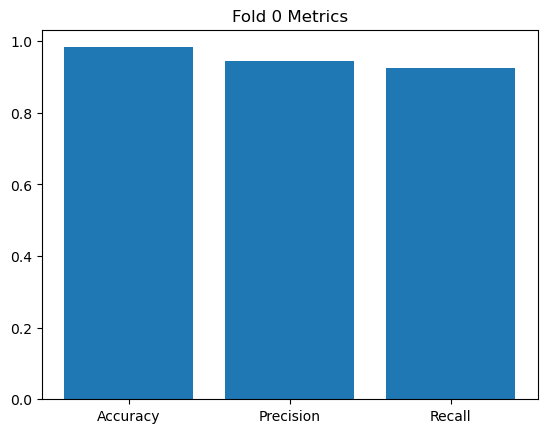

 Accuracy: 0.9829596412556054
 Precision: 0.9444444444444444


Fold 1


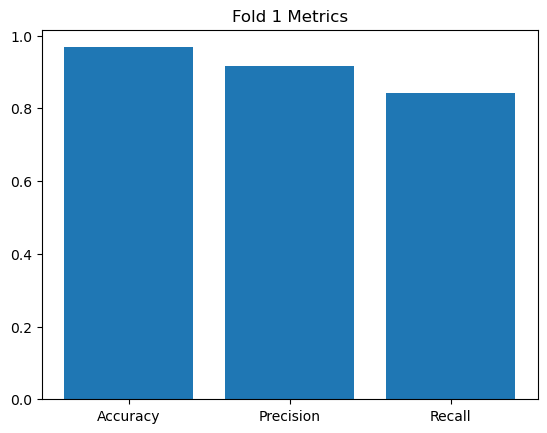

 Accuracy: 0.967713004484305
 Precision: 0.9148936170212766


Fold 2


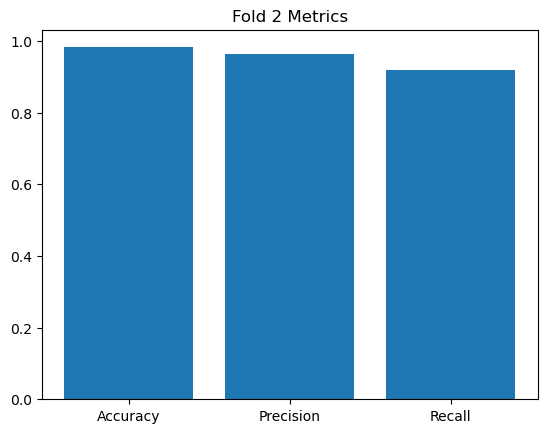

 Accuracy: 0.9820466786355476
 Precision: 0.9631901840490797


Fold 3


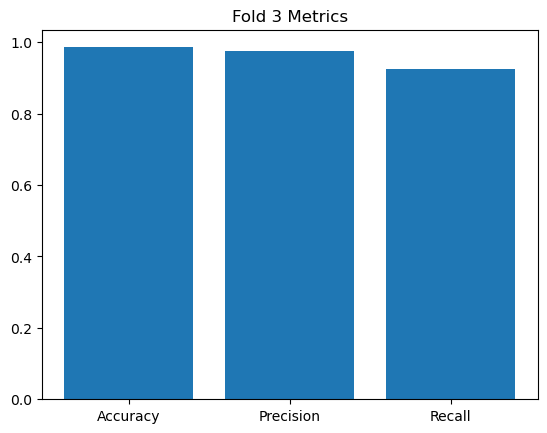

 Accuracy: 0.9856373429084381
 Precision: 0.974025974025974


Fold 4


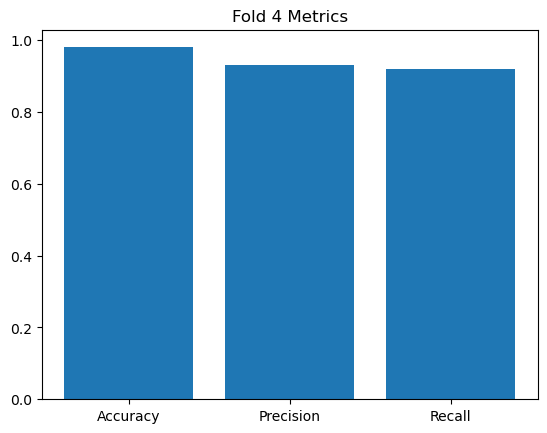

 Accuracy: 0.9802513464991023
 Precision: 0.9310344827586207


 Mean Accuracy: 0.9797216027565997
 Mean Precision: 0.9455177404598791
 Mean Recall: 0.9090212344077552


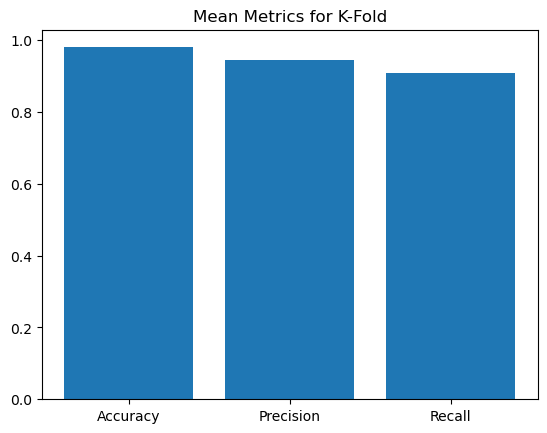

In [72]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    
   

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

Fold 0


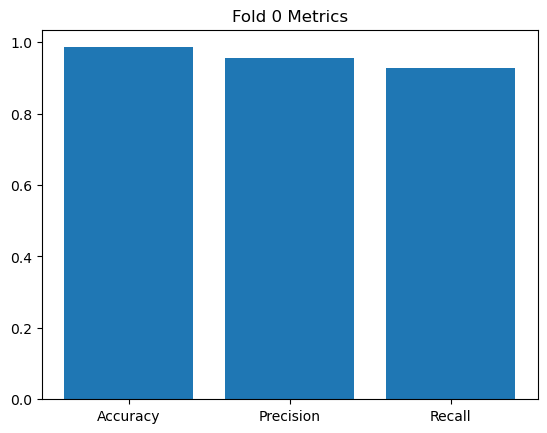

 Accuracy: 0.985663082437276
 Precision: 0.9545454545454546


Fold 1


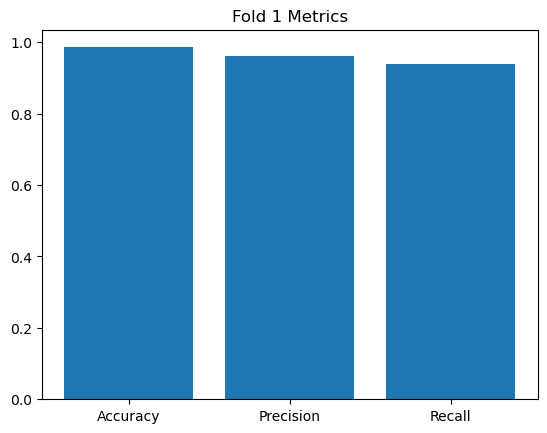

 Accuracy: 0.985663082437276
 Precision: 0.9615384615384616


Fold 2


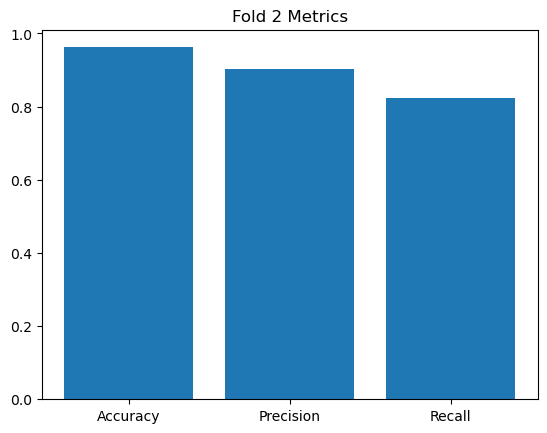

 Accuracy: 0.9622980251346499
 Precision: 0.9027777777777778


Fold 3


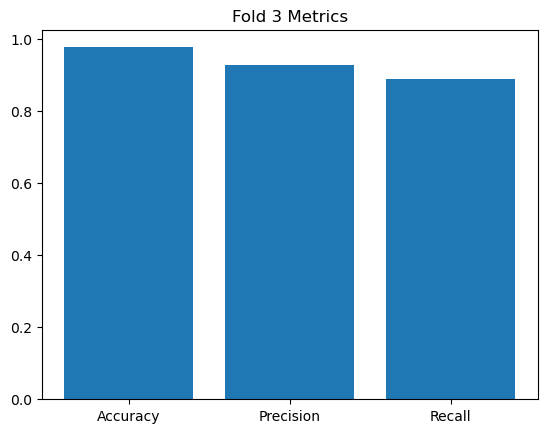

 Accuracy: 0.9766606822262118
 Precision: 0.927536231884058


Fold 4


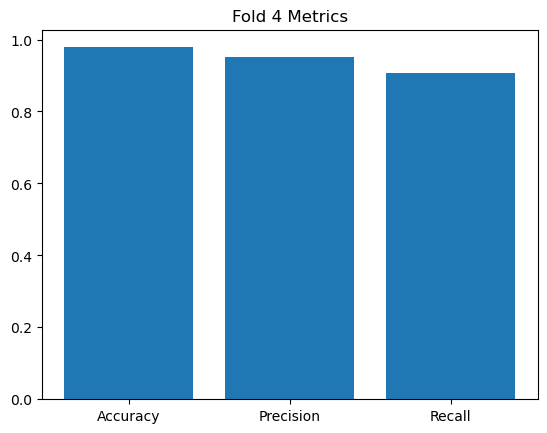

 Accuracy: 0.9784560143626571
 Precision: 0.9506172839506173


Fold 5


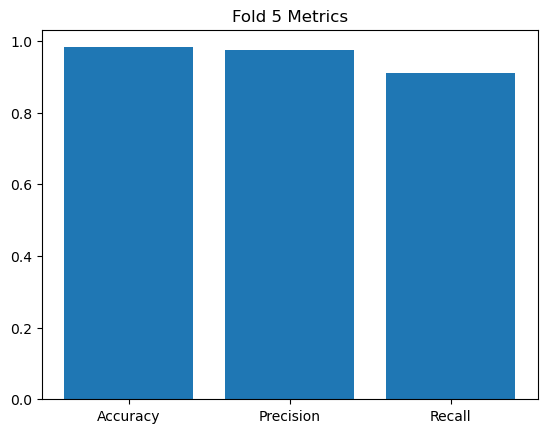

 Accuracy: 0.9820466786355476
 Precision: 0.975609756097561


Fold 6


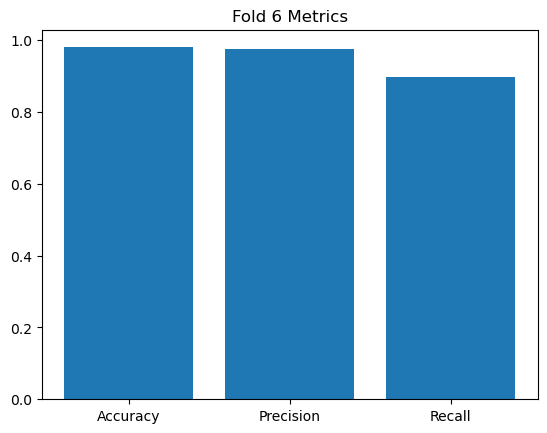

 Accuracy: 0.9802513464991023
 Precision: 0.9753086419753086


Fold 7


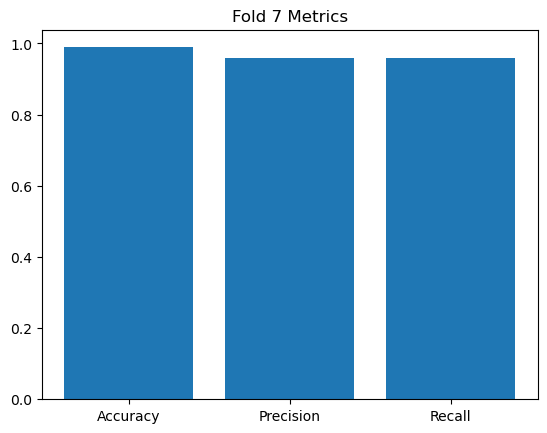

 Accuracy: 0.9892280071813285
 Precision: 0.958904109589041


Fold 8


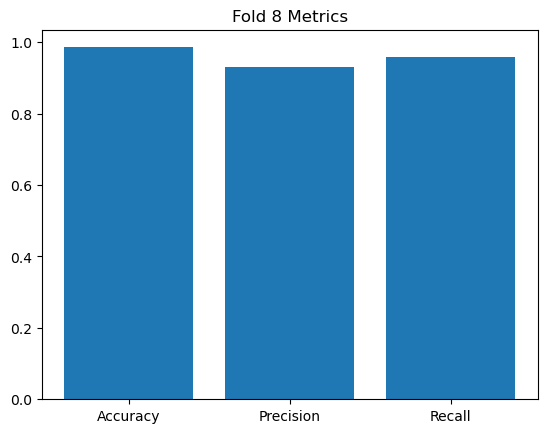

 Accuracy: 0.9856373429084381
 Precision: 0.9305555555555556


Fold 9


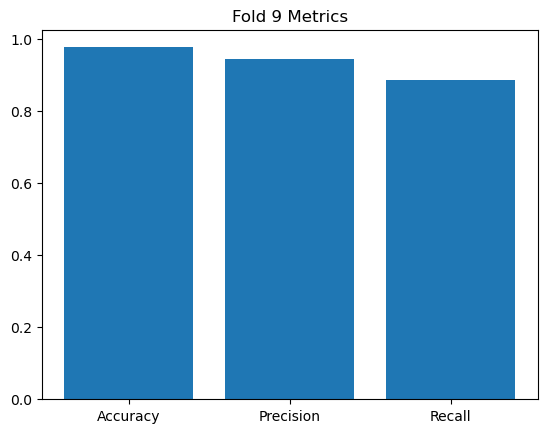

 Accuracy: 0.9766606822262118
 Precision: 0.9452054794520548


 Mean Accuracy: 0.98025649440487
 Mean Precision: 0.9482598752365891
 Mean Recall: 0.908981062050417


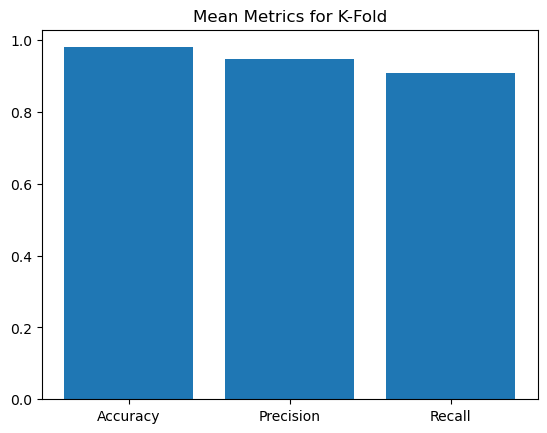

In [73]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    
 

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

In [21]:
imbalanced_file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\imbalanced_spam.csv"
df3 = pd.read_csv(imbalanced_file_path, encoding='latin-1')


df3 = df3.reindex(np.random.permutation(df3.index))
df3.reset_index(inplace=True, drop=True)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Jus telling u dat i'll b leaving 4 shanghai on...,NaN,NaN,NaN
1,ham,Wat uniform? In where get?,NaN,NaN,NaN
2,ham,I need details about that online job.,NaN,NaN,NaN
3,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...,NaN,NaN,NaN
4,ham,Dude avatar 3d was imp. At one point i thought...,NaN,NaN,NaN


In [22]:
df3['label'] = df3['label'].replace('ham',0)
df3['label'] = df3['label'].replace('spam',1)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,Jus telling u dat i'll b leaving 4 shanghai on...,NaN,NaN,NaN
1,0,Wat uniform? In where get?,NaN,NaN,NaN
2,0,I need details about that online job.,NaN,NaN,NaN
3,0,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...,NaN,NaN,NaN
4,0,Dude avatar 3d was imp. At one point i thought...,NaN,NaN,NaN


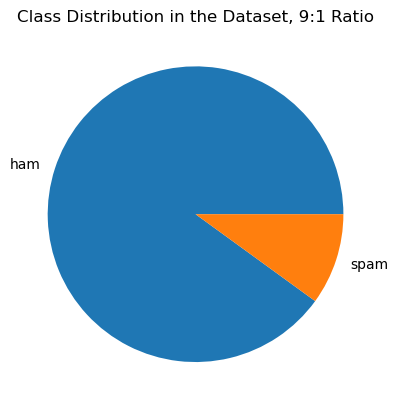

In [23]:
class_labels = ['ham','spam']
class_counts = [4500,500]
bar_colors = ['red','blue']
plt.pie(class_counts,labels = class_labels)
plt.title('Class Distribution in the Dataset, 9:1 Ratio')



plt.show()

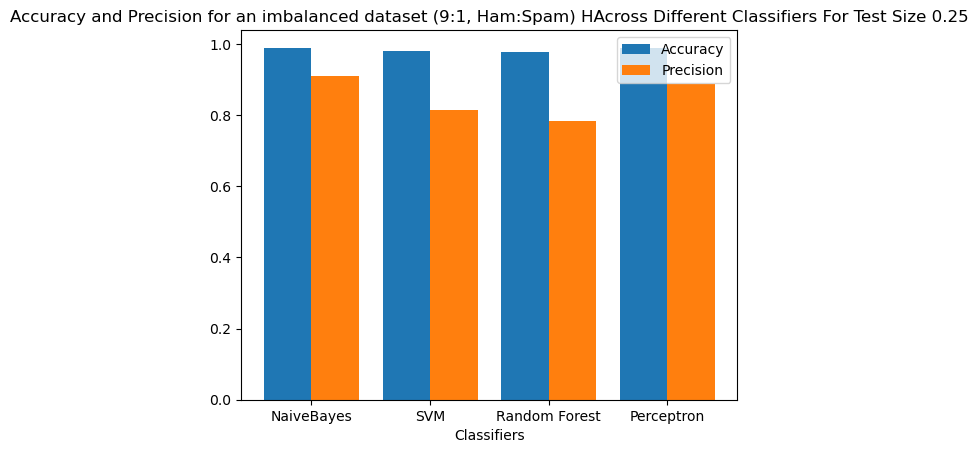

In [31]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

MNBPredict = MNB.predict(X_test)
SVMPredict = SVM.predict(X_test)
RFPredict = RF.predict(X_test) 
PPredict = P.predict(X_test)

PredictedProbabilities = [MNBPredict, SVMPredict, RFPredict, PPredict]
Classifiers = ['Multinomial Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Perceptron']


NB_accuracy = accuracy_score(MNBPredict, Y_test)
NB_precision = precision_score(MNBPredict, Y_test)
SVM_accuracy= accuracy_score(SVMPredict, Y_test)
SVM_precision = precision_score(SVMPredict, Y_test)
Random_Forest_accuracy =accuracy_score(RFPredict, Y_test)
Random_Forest_precision = precision_score(RFPredict, Y_test)
P_accuracy =accuracy_score(PPredict, Y_test)
P_precision = precision_score(PPredict, Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1, Ham:Spam) HAcross Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

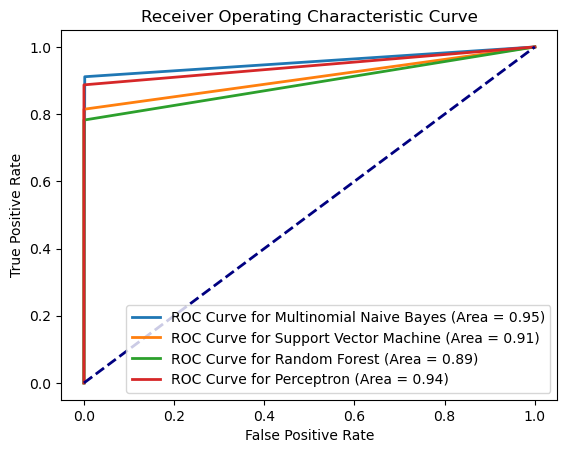

In [39]:
all_fpr = []
all_tpr = []

for prediction in Predictions:
    fpr, tpr, _ = roc_curve(Y_test, prediction)  # Calculate ROC for the current prediction
    all_fpr.append(fpr)  # Append to the accumulated fpr list
    all_tpr.append(tpr)  # Append to the accumulated tpr list

plt.figure()
for fpr, tpr, classifier in zip(all_fpr, all_tpr, Classifiers):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC Curve for %s (Area = %0.2f)' % (classifier, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
f

array([0.       , 0.0122807, 1.       ])

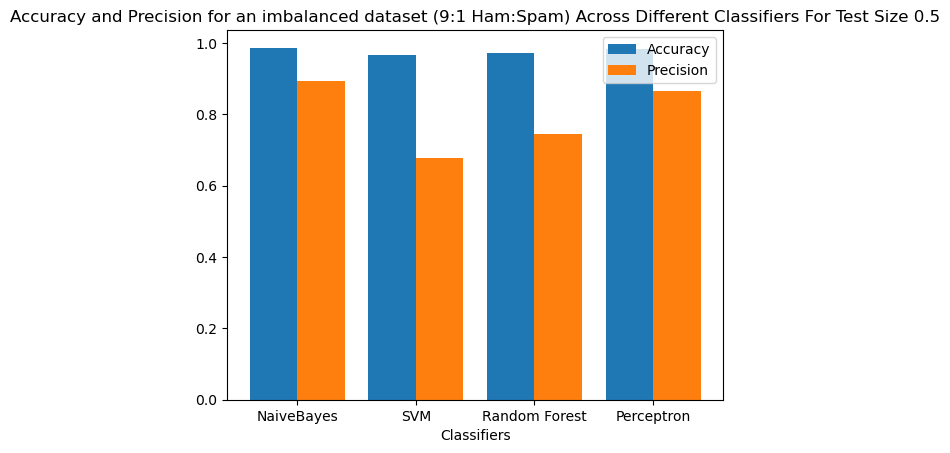

In [27]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1 Ham:Spam) Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()

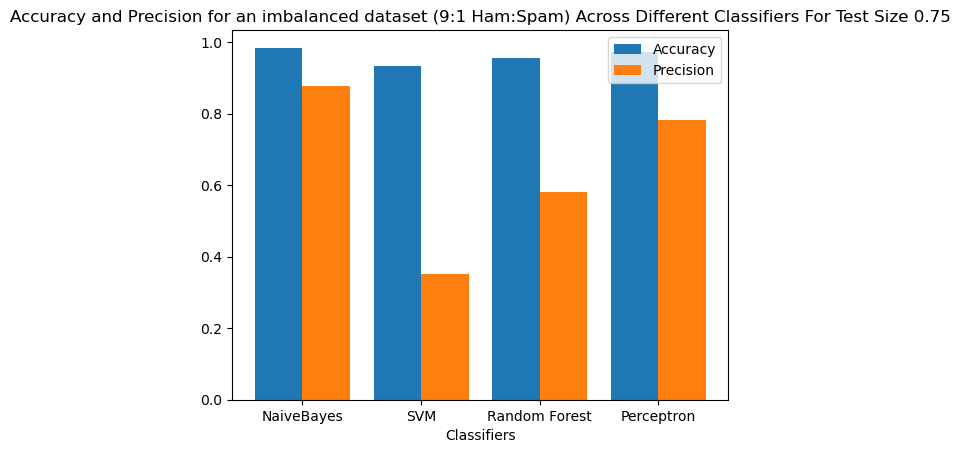

In [28]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1 Ham:Spam) Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()